<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn</center>

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [2]:
flights_df = pd.read_csv('../../data/2008.csv.bz2')

In [3]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')


In [4]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [5]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,NaN,NaN,NaN,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,NaN,NaN,NaN,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,NaN,NaN,NaN,1379.0


**Число уникальных рейсов:**

In [6]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных аггрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [7]:
flights_df.groupby('FlightNum')['Distance']\
  .sum().sort_values(ascending=False)\
  .iloc[0:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [8]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Cancelled     Distance               
             _total         mean      sum count
FlightNum                                      
1                42  1925.380929  7793942  4048
15               51  1823.795178  7639878  4189
2                53  1873.347838  6888300  3677

**Построение сводной таблицы:**

In [9]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

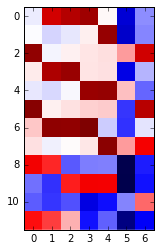

In [10]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none')

**Гистограмма длин перелетов.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127747d0>]], dtype=object)

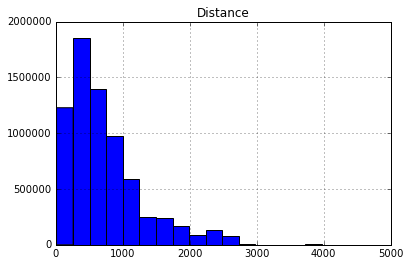

In [11]:
flights_df.hist('Distance', bins=20)

**Гистограмма частот перелетов в зависимости от даты.**

In [12]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [13]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

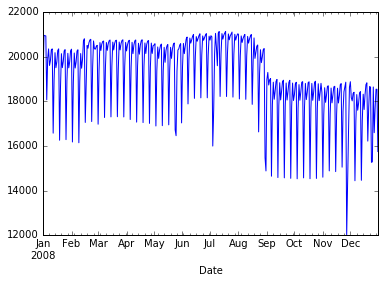

In [14]:
num_flights_by_date.plot()
plt.show()

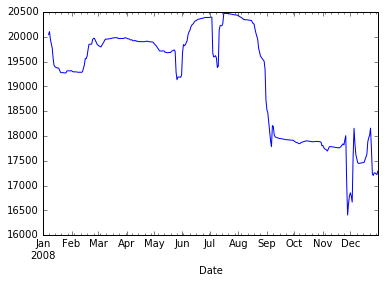

In [15]:
pd.rolling_mean(num_flights_by_date, 7).plot()
plt.show()

**1. Найдите топ-10 массовых перевозчиков (UniqueCarrier).**

In [16]:
flights_df.groupby('UniqueCarrier')['FlightNum']\
  .count().sort_values(ascending=False)\
  .iloc[0:10]

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: FlightNum, dtype: int64

С двухкратным отрывом лидируют Southwest Airlines, и не удивительно, если верить гуглу - самый большой в мире лоукостер

**2. Постройте распределение причин отмены рейсов (CancellationCode).**

In [17]:
flights_df.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

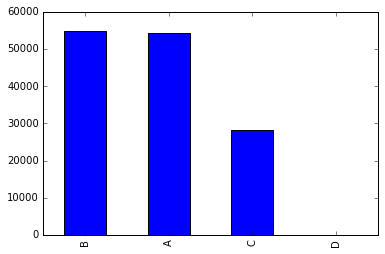

In [18]:
flights_df.CancellationCode.value_counts().plot(kind='bar')
plt.show()

А вот описания кодов отмены не нашел, так что загадочные A, B, C, и еще более загадочный D, остаются анонимными

**3. Найдите самый популярный маршрут, отобразите статистику по данному маршруту (просто describe для подвыборки).**

In [19]:
flights_df['route'] = flights_df.Origin+'-'+flights_df.Dest

In [20]:
flights_df.route.value_counts()[:5]

SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
Name: route, dtype: int64

Сан-Франциско - Лос-Анджелес, неплохой маршрут, не зря пользуется популярностью

<img src='http://images.privatefly.com/images/inspiration/lasan670x400.jpg' height="500" width="500">

In [21]:
flights_df[flights_df.route.isin(['SFO-LAX'])].describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788.0,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788.0,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008.0,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337.0,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0.0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0.0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008.0,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,NaN,945.000000,NaN,1110.000000,817.000000,NaN,...,337.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2008.0,6.000000,16.000000,4.000000,NaN,1315.000000,NaN,1443.000000,1153.000000,NaN,...,337.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2008.0,9.000000,23.000000,5.000000,NaN,1756.000000,NaN,1920.000000,1957.000000,NaN,...,337.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337.0,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**4. Найдите топ-5 рейсов (по числу полетов) по каждому из типов задержек рейсов. Каким перевозчикам они принадлежат?**

In [34]:
for code in ['A', 'B', 'C', 'D']:
    print('Топ-5 рейсов по коду задержки "{}"'.format(code))
    print(flights_df.groupby(['CancellationCode', 'UniqueCarrier'])['FlightNum'].count()[code].sort_values(ascending=False).iloc[0:5])
    print('=================')

Топ-5 рейсов по коду задержки "A"
UniqueCarrier
AA    9609
WN    6554
UA    6352
YV    5020
9E    4329
Name: FlightNum, dtype: int64
Топ-5 рейсов по коду задержки "B"
UniqueCarrier
MQ    8408
AA    5495
XE    5424
WN    5167
OH    5016
Name: FlightNum, dtype: int64
Топ-5 рейсов по коду задержки "C"
UniqueCarrier
MQ    6275
OO    4525
XE    3871
YV    2433
AA    2334
Name: FlightNum, dtype: int64
Топ-5 рейсов по коду задержки "D"
UniqueCarrier
MQ    4
WN    2
EV    2
AA    2
OO    1
Name: FlightNum, dtype: int64


**5. Определите, как распределено количество рейсов в зависимости от времени дня?**

In [50]:
def getTime(number):
    try:
        return datetime.datetime.strptime(str(number/100),'%H.%M')
    except:
        return np.NaN

In [51]:
flights_df['dayTime'] = flights_df.DepTime.apply(lambda x: getTime(x))

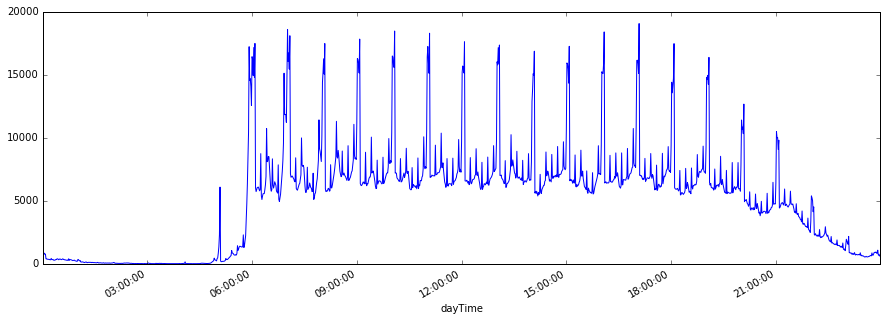

In [66]:
flights_df.groupby('dayTime')['FlightNum'].agg('count').plot(figsize = (15, 5))
plt.show()

Ох уж эта любовь к красивым числам - пики приходятся ровненько на "круглые" часы, вроде 9:00, 10:00 и так далее,а небольшие пики на 15-минутные интервалы между ними. А вот ночью особо не летают. 

**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте.**

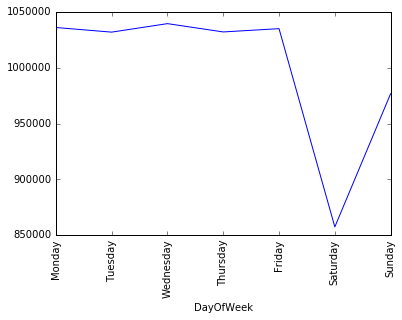

In [103]:
x = flights_df.groupby('DayOfWeek')['FlightNum'].agg('count')
x.plot()
plt.xticks(x.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='vertical')
plt.show()

На выходных особо не летают, в субботу так особенно, а самый загруженный день, получается, среда

---

А теперь получим номер недели в месяце, для этого воспользуемся чудесной библиотекой, найденной на просторах stackoverflow - calendar.

In [175]:
import calendar
import numpy as np
calendar.setfirstweekday(0)

def get_week_of_month(date):
    date = map(int, date.strftime("%Y-%m-%d").split('-'))
    year, month, day = date
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return week_of_month

Из-за костыльной реализации работает очень медленно, но как в векторный формат перегнать эту функцию, я не придумал :(

In [177]:
flights_df['Week_of_Month'] = flights_df.Date.apply(lambda x: get_week_of_month(x))

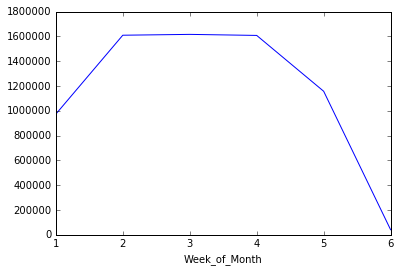

In [178]:
flights_df.groupby('Week_of_Month')['FlightNum'].agg('count').plot()
plt.show()

Вышло не особо информативно, первая, пятая и шетая неделя есть не в каждом месяце :(
Попробуем просто аггрегировать наши полеты по номеру недели в году 

In [185]:
flights_df['WeekNumber'] = flights_df.Date.apply(lambda x: x.isocalendar()[1])

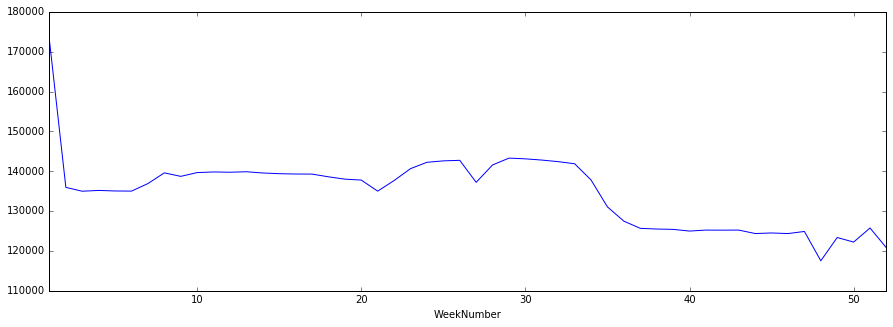

In [186]:
flights_df.groupby('WeekNumber')['FlightNum'].agg('count').plot(figsize = (15, 5))
plt.show()

Картинка уже поинтереснее, пик перелетов пришелся на первые пару недель года, еще несколько возвышений - в середине и конце лета, а вот осенью и зимой - провал

Наконец, месяц

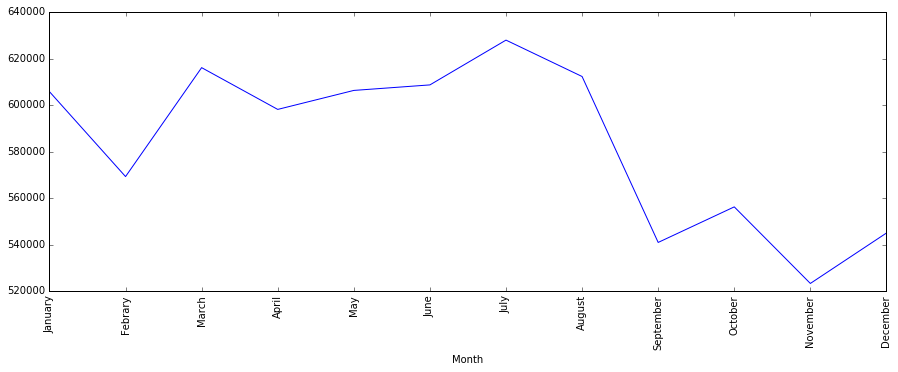

In [187]:
x = flights_df.groupby('Month')['FlightNum'].agg('count')
x.plot(figsize = (15, 5))
plt.xticks(x.index, ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December'], rotation='vertical')
plt.show()

И действительно, осень и зима особой популярностью не пользуются для полетов, за исключением января